In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from bokeh.io import output_notebook
from functools import reduce
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, f1_score


%matplotlib inline

# Load the data

### Crime rates

In [2]:
# For the moment only data from 2005to 2009 available
crimes = pd.read_csv("data/crime_borough_2005_2014.csv")
print(crimes.shape)
crimes.head()

(330, 44)


,Borough,Year,Murder,Wounding/GBH,Assault With Injury,Common Assault,Offensive Weapon,Harassment,Other Violence,Violence Against The Person,...,Other Criminal Damage,Criminal Damage,Drug Trafficking,Possession Of Drugs,Other Drugs,Drugs,Going Equipped,Other Notifiable,Other Notifiable Offences,Total Notifiable Offences
0,Barking and Dagenham,2014,3,510,1173,1106,54,1137,217,4200,...,346,1647,87,1120,6,1213,11,292,303,16104
1,Barnet,2014,2,511,1110,1217,84,1424,209,4557,...,450,1965,103,1019,7,1129,24,298,322,22724
2,Bexley,2014,0,324,725,704,46,805,168,2772,...,300,1398,91,791,4,886,8,227,235,11837
3,Brent,2014,6,830,1546,1657,151,1819,401,6410,...,530,2047,149,3223,33,3405,15,443,458,24476
4,Bromley,2014,2,478,1221,1074,79,1392,181,4427,...,530,2047,78,1013,7,1098,14,259,273,19445


In [3]:
def select_borough(df, borough):
    """
    Get just the data of a specific borough sorted by year.
    """
    return df[df["Borough"]==borough].sort_values("Year")

In [4]:
def select_year(df, year, orderby=None):
    """
    Get just the data of a specific year. Sort if asked.
    """
    df = df[df["Year"]==year]
    if orderby:
        df = df.sort_values(orderby, ascending=False)
    return df

In [5]:
crime_categories = ["Theft & Handling", "Violence Against The Person",
                    "Burglary", "Robbery", "Criminal Damage", "Drugs","Sexual Offences",
                    "Other Notifiable Offences", "Fraud & Forgery"]

In [6]:
def plot_crime_year(df, year):
    """
    Plot crime rate for the given year for each borough.
    """
    df = select_year(df, year, "Total Notifiable Offences")
    f, ax = plt.subplots(figsize=(12, 8))
    ax.set_title("Crime rates per borough - " + str(year))
    df[["Borough"] + crime_categories].plot(ax=ax, x="Borough", kind='bar', stacked=True, colormap="Accent")

In [7]:
def plot_crime_evolution(df, borough):
    """
    Plot crime rate evolution in the given borough.
    """
    df = select_borough(df, borough)
    f, ax = plt.subplots(figsize=(12, 8))
    ax.set_title("Crime evolution in " + borough)
    df[["Year"] + crime_categories].plot(ax=ax, x="Year", kind="area", colormap="Accent")
    ax.set_xticklabels(df.Year)

In [8]:
def plot_crime_aggregated_evolution(df):
    """
    Plot crime rate evolution for the aggregated total over years.
    """
    df = df.groupby(['Year'], as_index=False).sum()
    df = df.sort_values("Year")

    f, ax = plt.subplots(figsize=(12, 8))
    ax.set_title("Total crime rates evolution by year (all boroughs grouped)")
    df[["Year"] + crime_categories].plot(ax=ax, x="Year", kind="area", colormap="Accent")
    ax.set_xticklabels(df.Year)

### Population estimates

In [9]:
population = pd.read_csv("data/population_estimates_borough_2005_2014.csv")
print(population.shape)
population.head()

(330, 5)


,Borough,Total Citizens,Men,Women,Year
0,City of London,7131,3869,3262,2005
1,Barking and Dagenham,166275,80029,86246,2005
2,Barnet,327541,157292,170249,2005
3,Bexley,222391,107014,115377,2005
4,Brent,270939,135296,135643,2005


In [10]:
def plot_population_year(df, year):
    """
    Plot population estimates for the given year for each borough.
    """
    df = select_year(df, year, "PERSONS")
    f, ax = plt.subplots(figsize=(12, 8))
    ax.set_title("Population per borough - " + str(year))
    df[["Borough", "Men", "Women"]].plot(ax=ax, x="Borough", kind='bar', stacked=True, colormap="Accent")

In [11]:
def plot_population_evolution(df, borough):
    """
    Plot population estimates evolution in the given borough.
    """
    df = select_borough(df, borough)
    f, ax = plt.subplots(figsize=(12, 8))
    ax.set_title("Population evolution in " + borough)
    df[["Year", "Men", "Women"]].plot(ax=ax, x="Year", kind="area", colormap="Accent")
    ax.set_xticklabels(df.Year)

### Carbon emissions

In [12]:
# Load carbon emissions dataset
co2 = pd.read_csv("data/carbon_emissions_borough_2005_2014.csv")
co2.drop("Grand Total Emissions", axis=1, inplace=True)
print(co2.shape)
co2.head()

(330, 7)


,Borough,Year,Industry and Commercial Emissions,Domestic Emissions,Transport Emissions,LULUCF Emissions,Per Capita Emissions (t)
0,City of London,2005,1546.4,20.3,65.3,0.1,228.9
1,Barking and Dagenham,2005,396.2,345.9,188.3,0.8,5.6
2,Barnet,2005,460.5,868.1,432.5,2.9,5.4
3,Bexley,2005,485.1,531.0,266.8,2.1,5.8
4,Brent,2005,543.0,616.5,267.4,1.2,5.3


In [13]:
co2_categories = ["Industry and Commercial Emissions", "Domestic Emissions", "Transport Emissions"]

In [14]:
def plot_co2_evolution(df, borough):
    """
    Plot CO2 evolution in the given borough.
    """
    df = select_borough(df, borough)
    f, ax = plt.subplots(figsize=(12, 8))
    ax.set_title("CO2 emissions evolution in " + borough)
    df[["Year"] + co2_categories].plot(ax=ax, x="Year", kind="area",
                                                                         colormap="Accent")
    ax.set_xticklabels(df.Year)

In [15]:
def plot_co2_year(df, year):
    df = select_year(df, year, orderby="Per Capita Emissions (t)")
    f, ax = plt.subplots(figsize=(12, 8))
    ax.set_title("CO2 per capita emissions - " + str(year))
    df[["Borough", "Per Capita Emissions (t)"]].plot(ax=ax, x="Borough", kind='bar',
                                                          colormap="Accent")

### Births and fertility rates

In [16]:
# Load births and fertility
fertility = pd.read_csv("data/births_fertility_rates_borough_2005_2014.csv")
print(fertility.shape)
fertility.head()

(321, 5)


,Borough,Year,Live births,GFR,TFR
0,Barking and Dagenham,2005,2985.0,79.2,2.36
1,Barnet,2005,4728.0,62.8,1.77
2,Bexley,2005,2686.0,58.6,1.85
3,Brent,2005,4503.0,69.2,1.96
4,Bromley,2005,3663.0,59.1,1.76


### Business demographics

In [17]:
# Load business demographics
business = pd.read_csv("data/business_demographics_borough_2005_2014.csv")
print(business.shape)
business.head()

(330, 5)


,Borough,Year,Business Births rate,Business Deaths rate,Active enterprises
0,City of London,2005,10.90,8.35,11970
1,Barking and Dagenham,2005,15.67,12.38,3190
2,Barnet,2005,12.70,14.01,19095
3,Bexley,2005,13.72,11.51,6560
4,Brent,2005,15.47,13.33,11250


### Dwellings

In [18]:
# Load dwellings
dwellings = pd.read_csv("data/dwellings_per_borough_2005_2014.csv")
print(dwellings.shape)
dwellings.head()

(330, 3)


,Borough,Year,Dwellings per hectare
0,City of London,2005,17.1
1,Barking and Dagenham,2005,18.3
2,Barnet,2005,15.4
3,Bexley,2005,14.5
4,Brent,2005,24.3


### Income of tax payers

In [19]:
# Load income of tax payers
income = pd.read_csv("data/income_of_tax_payers_borough_2005_2014.csv")
print(income.shape)
income.head()

(330, 5)


,Borough,Number of Tax Payers,Mean Tax Payer Income (£),Median Tax Payer Income (£),Year
0,City of London,10000,95600,44400,2005
1,Barking and Dagenham,77000,19400,16600,2005
2,Barnet,155000,32800,19900,2005
3,Bexley,124000,22300,17700,2005
4,Brent,137000,21800,16500,2005


### Job seeker allowances

In [20]:
# Load job seeker allowance
allowance = pd.read_csv("data/job_seekers_allowance_borough_2005_2014.csv")
print(allowance.shape)
allowance.head()

(330, 4)


,Borough,Total Job seekers,Job seeker Rate,Year
0,City of London,470,6.8,2005
1,Barking and Dagenham,15470,14.6,2005
2,Barnet,19310,8.9,2005
3,Bexley,10910,7.7,2005
4,Brent,26790,15.2,2005


###  Mothers by country of birth

In [21]:
# Load country of birth of mother
birth_mother = pd.read_csv("data/mother_country_of_birth_borough_2005_2014.csv")
print(birth_mother.shape)
birth_mother.head()

(320, 6)


,Borough,All Live Births,Mothers Born within United Kingdom,Mothers born outside United Kingdom,Percentage of live births to non-UK born mothers,Year
0,Barking and Dagenham,2985,1638,1347,45.1,2005
1,Barnet,4728,2342,2386,50.5,2005
2,Bexley,2686,2108,578,21.5,2005
3,Brent,4503,1411,3092,68.7,2005
4,Bromley,3663,2916,747,20.4,2005


### Unemployment rates

In [22]:
# Load unemployment
unemployment = pd.read_csv("data/unemployment_rates_borough_2005_2014.csv")
print(unemployment.shape)
unemployment.head()

(320, 4)


,Borough,Unemployment Level,Unemployment Rate,Year
0,Barking and Dagenham,6600,9.1,2005
1,Barnet,11500,7.0,2005
2,Bexley,5700,5.0,2005
3,Brent,10500,7.9,2005
4,Bromley,7600,4.7,2005


## Merge datasets into one by borough and year

In [23]:
common_cols = ["Borough", "Year"]
data_frames = [crimes, population, co2, fertility, business, 
               dwellings, income, allowance, birth_mother,
               unemployment]
  
data = reduce(lambda x,y: x.merge(y, on=common_cols), data_frames)
print(data.shape)
data.sample(5)

(320, 70)


,Borough,Year,Murder,Wounding/GBH,Assault With Injury,Common Assault,Offensive Weapon,Harassment,Other Violence,Violence Against The Person,...,Mean Tax Payer Income (£),Median Tax Payer Income (£),Total Job seekers,Job seeker Rate,All Live Births,Mothers Born within United Kingdom,Mothers born outside United Kingdom,Percentage of live births to non-UK born mothers,Unemployment Level,Unemployment Rate
271,Barking and Dagenham,2006,4,143,2441,1191,153,1190,166,5288,...,20600,17900,16250,15.2,3208,1658,1550,48.3,6900,9.5
16,Hounslow,2014,0,566,1311,1496,67,1570,218,5228,...,35800,23700,13900,7.7,4245,1414,2831,66.7,8900,6.0
280,Hounslow,2006,4,131,2396,1581,151,1704,467,6434,...,26900,18800,13830,8.8,3829,1685,2144,56.0,9400,7.6
191,Enfield,2009,6,261,1669,1117,181,794,205,4233,...,20800,15900,34560,18.2,4828,2008,2820,58.4,15400,11.2
300,Waltham Forest,2005,3,155,1702,2358,313,1444,266,6241,...,20800,16600,23330,15.7,3989,1781,2208,55.4,10200,9.1


## Normalize crimes per 100k citizens

In [24]:
data.update(data.iloc[:,2:44].div(data["Total Citizens"], axis=0).apply(lambda x: x*1e5))
print(data.shape)
data.sample(5)

(320, 70)


,Borough,Year,Murder,Wounding/GBH,Assault With Injury,Common Assault,Offensive Weapon,Harassment,Other Violence,Violence Against The Person,...,Mean Tax Payer Income (£),Median Tax Payer Income (£),Total Job seekers,Job seeker Rate,All Live Births,Mothers Born within United Kingdom,Mothers born outside United Kingdom,Percentage of live births to non-UK born mothers,Unemployment Level,Unemployment Rate
317,Barnet,2005,0.915916,40.300298,717.772737,602.062032,47.322320,699.454419,85.180176,2193.007898,...,32800,19900,19310,8.9,4728,2342,2386,50.5,11500,7.0
96,Barking and Dagenham,2011,0.534676,106.935288,953.862770,618.085965,60.953114,553.390116,100.519171,2394.281101,...,22500,19400,28320,23.8,3688,1460,2228,60.4,11200,13.0
134,Lewisham,2010,2.935511,141.271443,846.160903,688.377213,90.266948,899.367031,137.602055,2805.981103,...,28700,22300,35660,19.0,4982,2361,2621,52.6,14500,10.5
170,Hammersmith and Fulham,2009,0.555198,119.367519,906.082747,505.229963,92.718026,1002.687157,114.925937,2741.566546,...,35400,19300,20090,16.2,2841,1261,1580,55.6,9100,9.1
209,Bexley,2008,0.882410,31.766761,634.452818,375.465471,44.120502,285.459647,52.062192,1424.209802,...,26700,19800,10070,7.0,2975,2189,786,26.4,6400,5.6


## Missing values

In [25]:
print(data.columns[data.isnull().any()])
data[data.isnull().any(axis=1)]

Index([], dtype='object')


,Borough,Year,Murder,Wounding/GBH,Assault With Injury,Common Assault,Offensive Weapon,Harassment,Other Violence,Violence Against The Person,...,Mean Tax Payer Income (£),Median Tax Payer Income (£),Total Job seekers,Job seeker Rate,All Live Births,Mothers Born within United Kingdom,Mothers born outside United Kingdom,Percentage of live births to non-UK born mothers,Unemployment Level,Unemployment Rate


# Visualization

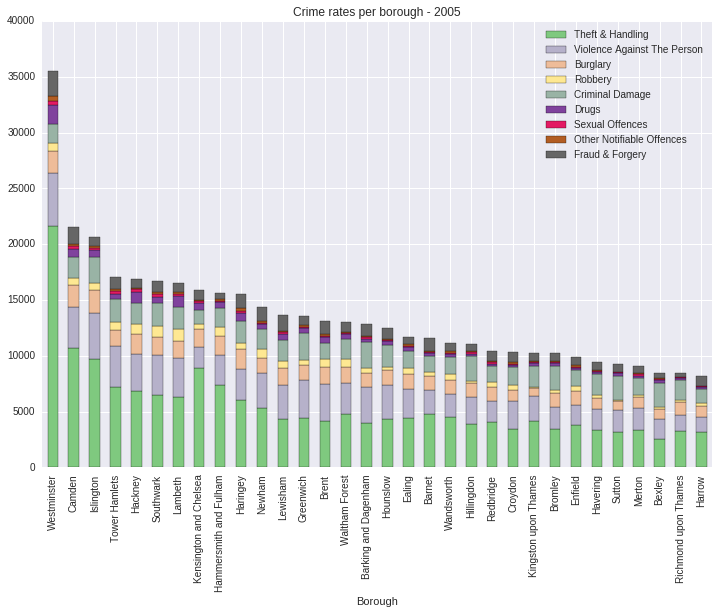

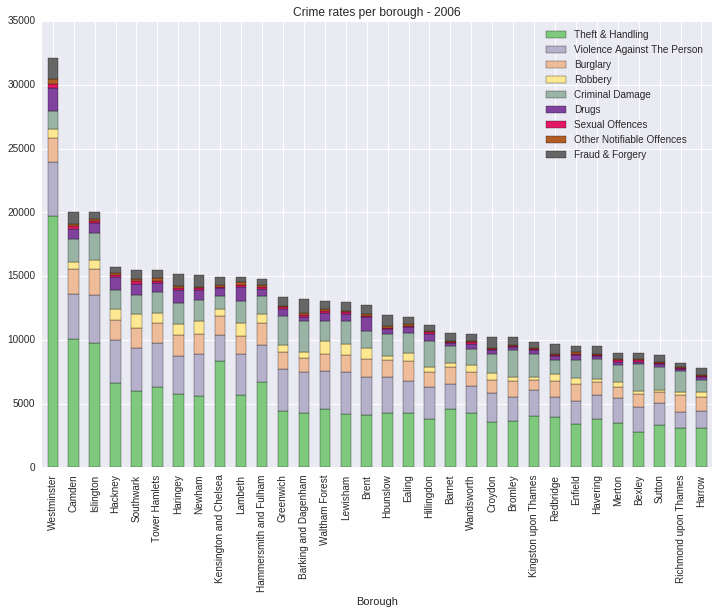

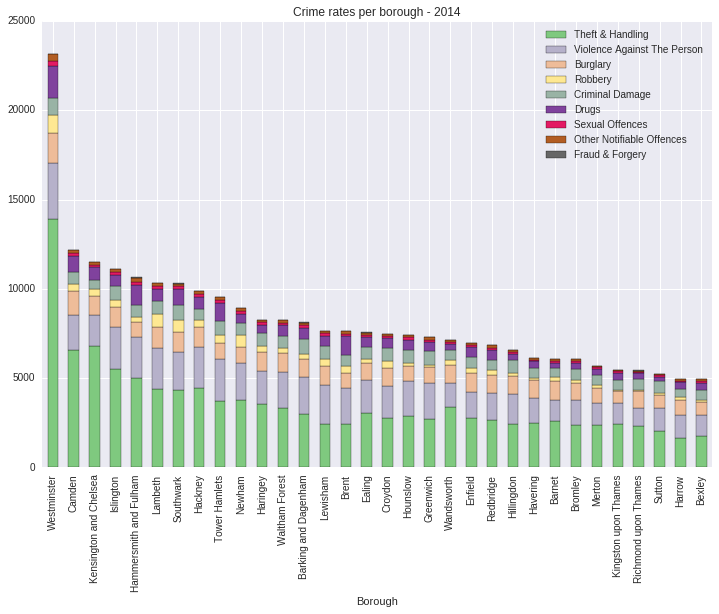

In [26]:
plot_crime_year(data, 2005)
plot_crime_year(data, 2006)
plot_crime_year(data, 2014)

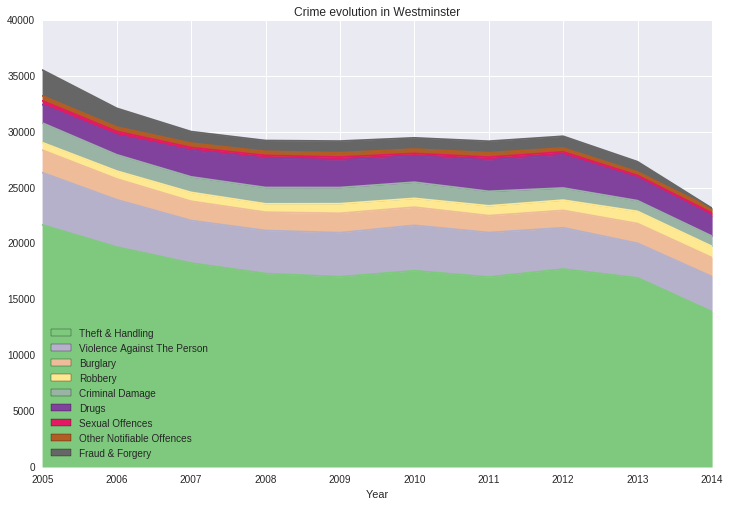

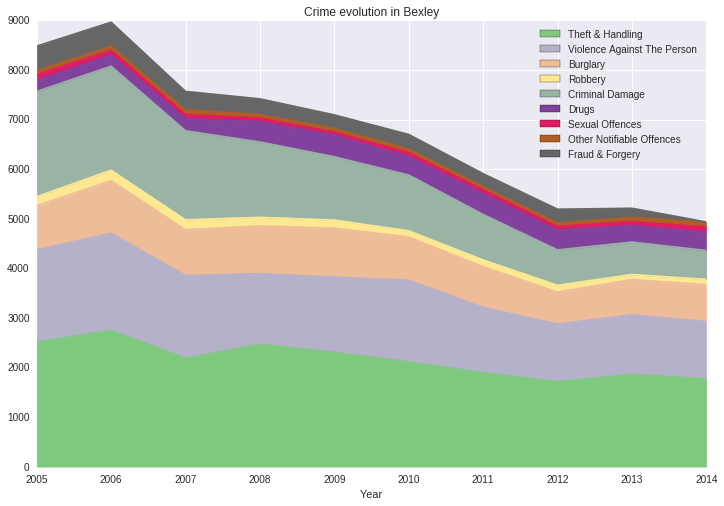

In [27]:
# Plot crime in Westminster - most criminal borough
plot_crime_evolution(data, "Westminster")
# Take crime in Bexley - less criminal borough
plot_crime_evolution(data, "Bexley")

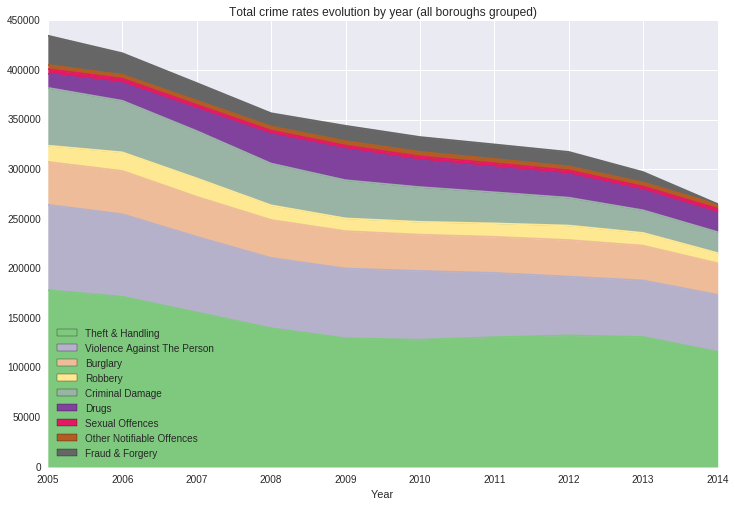

In [28]:
plot_crime_aggregated_evolution(data)

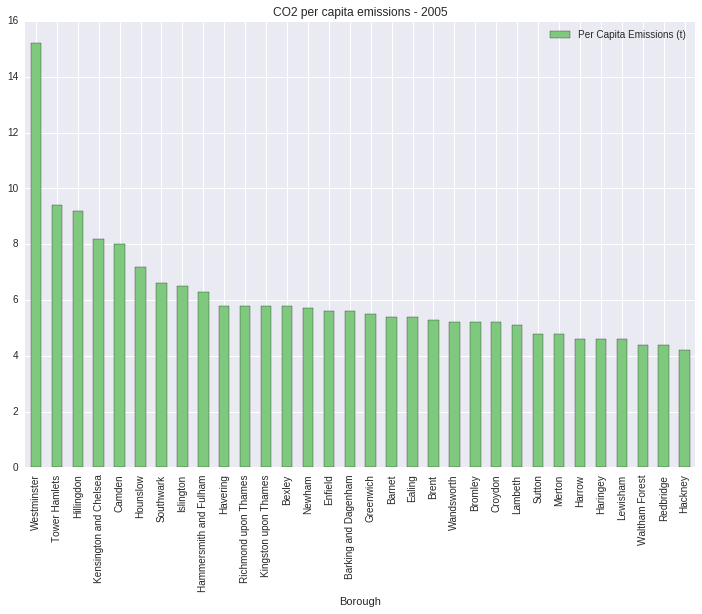

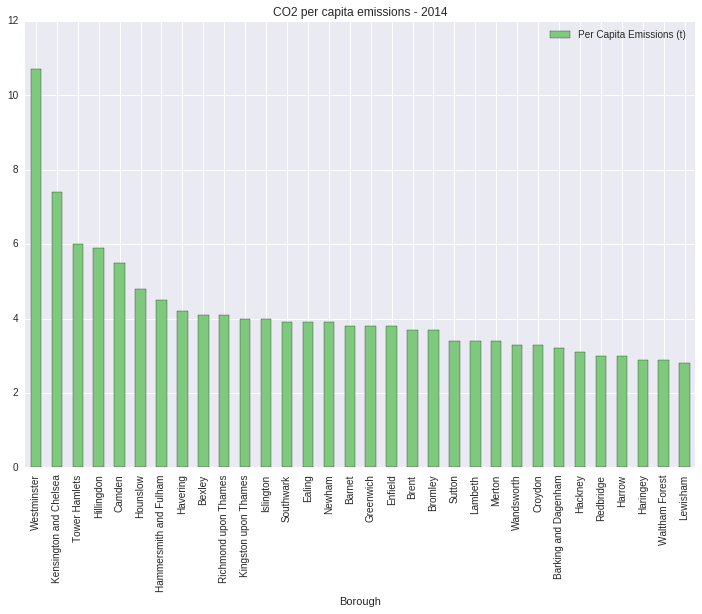

In [29]:
plot_co2_year(data, 2005)
plot_co2_year(data, 2014)

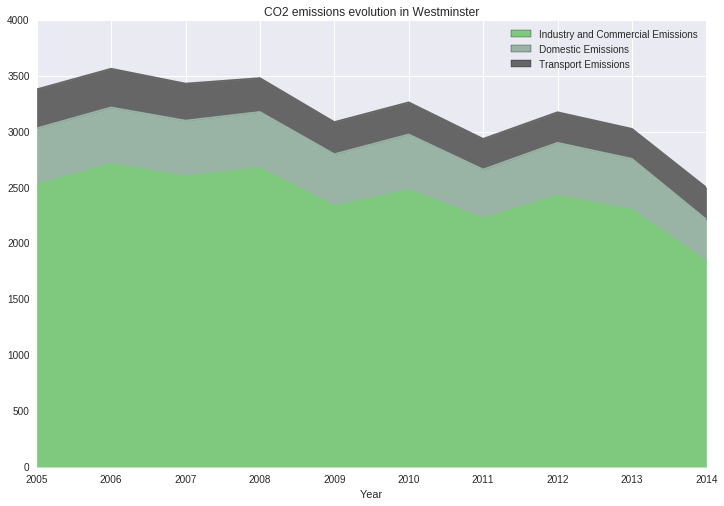

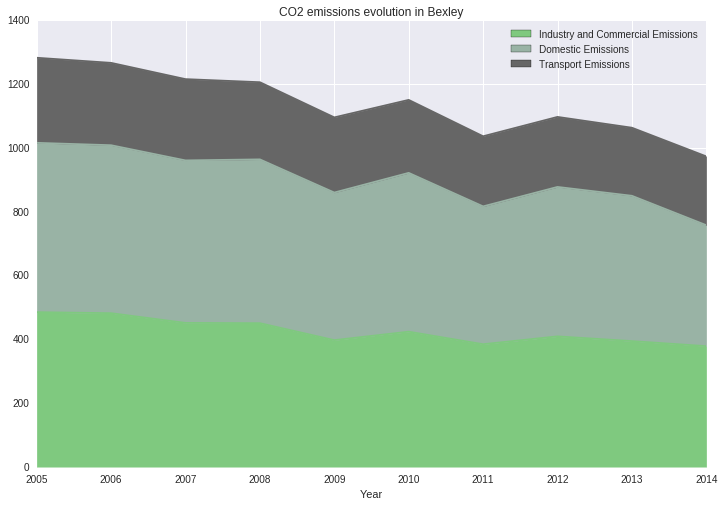

In [30]:
# Plot CO2 emissions in Westminster - most criminal borough
plot_co2_evolution(data, "Westminster")
# Plot CO2 emissions in Bexley - less criminal borough
plot_co2_evolution(data, "Bexley")

### Criminality thresholds

In [48]:
# Add total crime to categories
crime_categories.append("Total Notifiable Offences")

In [71]:
df_mean = data.mean()
df_std = data.std()

print("Mean crime rates over all years and boroughs:")
print(df_mean[crime_categories])

print("\nStandard deviation of crime rates over all years and boroughs:")
print(df_std[crime_categories])

Mean crime rates over all years and boroughs:
Theft & Handling                4412.915412
Violence Against The Person     2170.693370
Burglary                        1186.766357
Robbery                          455.055236
Criminal Damage                 1178.004159
Drugs                            721.562374
Sexual Offences                  124.602888
Other Notifiable Offences        135.305883
Fraud & Forgery                  474.716377
Total Notifiable Offences      10859.622057
dtype: float64

Standard deviation of crime rates over all years and boroughs:
Theft & Handling               2916.489162
Violence Against The Person     715.661197
Burglary                        264.274391
Robbery                         237.566829
Criminal Damage                 432.553104
Drugs                           467.726397
Sexual Offences                  42.689374
Other Notifiable Offences        64.204356
Fraud & Forgery                 295.605817
Total Notifiable Offences      4573.086567
dtype

In [50]:
#df_th = pd.DataFrame(df_mean.add(df_std)[crime_categories]).transpose()

df_th = pd.DataFrame(df_mean[crime_categories]).transpose()


df_th.head()

,Theft & Handling,Violence Against The Person,Burglary,Robbery,Criminal Damage,Drugs,Sexual Offences,Other Notifiable Offences,Fraud & Forgery,Total Notifiable Offences
0,4412.915412,2170.69337,1186.766357,455.055236,1178.004159,721.562374,124.602888,135.305883,474.716377,10859.622057


In [53]:
m = data[["Borough", "Year"] + crime_categories].as_matrix()
targets = []
for i, cat in enumerate(crime_categories):
    targets.append((m[:,i+2] > df_th[cat][0]).astype(int))
targets = np.array(targets)
for i, arr in enumerate(targets):
    print("Above threshold instances for " +
          crime_categories[i] + ": " +
          str(sum(arr)) + "/" + str(len(arr)) +
          " (" + str(100.0*sum(arr)/len(arr)) + "%)"
         )

Above threshold instances for Theft & Handling: 92/320 (28.75%)
Above threshold instances for Violence Against The Person: 147/320 (45.9375%)
Above threshold instances for Burglary: 137/320 (42.8125%)
Above threshold instances for Robbery: 140/320 (43.75%)
Above threshold instances for Criminal Damage: 145/320 (45.3125%)
Above threshold instances for Drugs: 128/320 (40.0%)
Above threshold instances for Sexual Offences: 132/320 (41.25%)
Above threshold instances for Other Notifiable Offences: 136/320 (42.5%)
Above threshold instances for Fraud & Forgery: 145/320 (45.3125%)
Above threshold instances for Total Notifiable Offences: 125/320 (39.0625%)


In [54]:
print(targets.shape)
targets = targets.T
print(targets.shape)
targets

(10, 320)
(320, 10)


array([[0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ..., 
       [1, 1, 1, ..., 0, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [0, 0, 1, ..., 0, 1, 0]])

In [55]:
features_sets = [population, co2, fertility, business, 
                 dwellings, income, allowance, birth_mother,
                 unemployment]
  
features_df = reduce(lambda x,y: x.merge(y, on=common_cols), features_sets)

features_df.drop("Borough", axis=1, inplace=True)
features_df.drop("Year", axis=1, inplace=True)

features = features_df.as_matrix()
features.shape

(320, 26)

In [56]:
features_names = features_df.columns.values
features_names

array(['Total Citizens', 'Men', 'Women',
       'Industry and Commercial Emissions', 'Domestic Emissions',
       'Transport Emissions', 'LULUCF Emissions',
       'Per Capita Emissions (t)', 'Live births', 'GFR', 'TFR',
       'Business Births rate', 'Business Deaths rate',
       'Active enterprises', 'Dwellings per hectare',
       'Number of Tax Payers', 'Mean Tax Payer Income (£)',
       'Median Tax Payer Income (£)', 'Total Job seekers',
       'Job seeker Rate', 'All Live Births',
       'Mothers Born within United Kingdom',
       'Mothers born outside United Kingdom',
       'Percentage of live births to non-UK born mothers',
       'Unemployment Level', 'Unemployment Rate'], dtype=object)

### Baseline model

In [57]:
def plot_importance(X, y, category):
    # Extract category target
    y = y[:, crime_categories.index(category)]
    
    # Split data randomly in train and test set
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y)
    
    # Train and evaluate model
    print("Results for category: " + category)
    baseline = RandomForestClassifier(n_estimators=250,
                                      criterion="gini",
                                      max_features=None, # Use all features to get stronger importances
                                      min_samples_split=4,
                                      class_weight="balanced_subsample",
                                      oob_score=True,
                                      n_jobs=-1)
    baseline.fit(X_train, y_train)
    print("Out of bag score:" + str(baseline.oob_score_))
    print("Test score: " + str(baseline.score(X_test, y_test)))
    print("Confusion matrix: " + str(confusion_matrix(y_test, baseline.predict(X_test))))
    print("F1-Score: " + str(f1_score(y_test, baseline.predict(X_test))))
    
    # Retrain model with all the data
    baseline.fit(X, y)

    # Get importances
    importances = baseline.feature_importances_
    std = np.std([tree.feature_importances_ for tree in baseline.estimators_],
                 axis=0)
    indices = np.argsort(importances)[::-1]
    
    # Plot the feature importances of the forest
    pd.DataFrame(importances[indices],
                 index=features_names[indices]).plot(title="Feature importances - " + category,
                                                     kind='bar', #colormap="Accent",
                                                     figsize=(12, 8), legend=False)

Results for category: Theft & Handling
Out of bag score:0.8375
Test score: 0.9375
Confusion matrix: [[56  1]
 [ 4 19]]
F1-Score: 0.883720930233


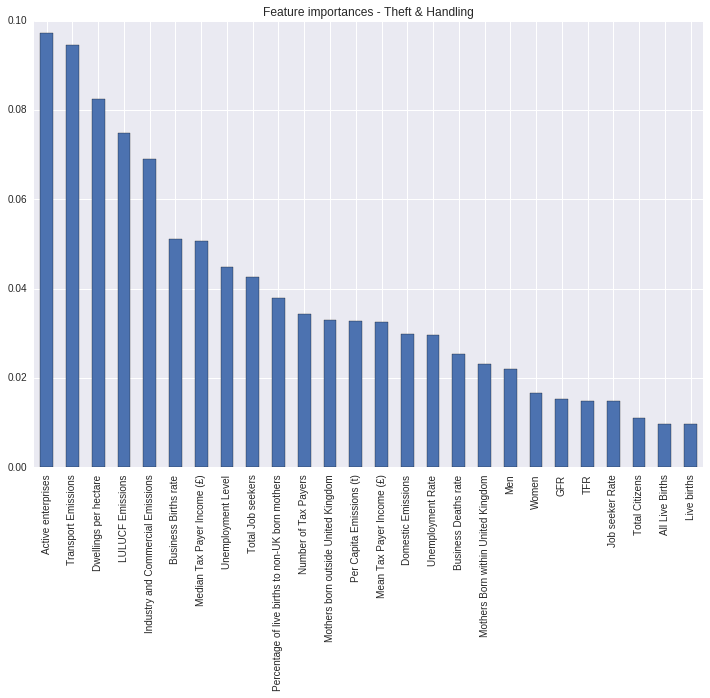

In [58]:
plot_importance(features, targets, crime_categories[0])

Results for category: Violence Against The Person
Out of bag score:0.820833333333
Test score: 0.8125
Confusion matrix: [[38  5]
 [10 27]]
F1-Score: 0.782608695652


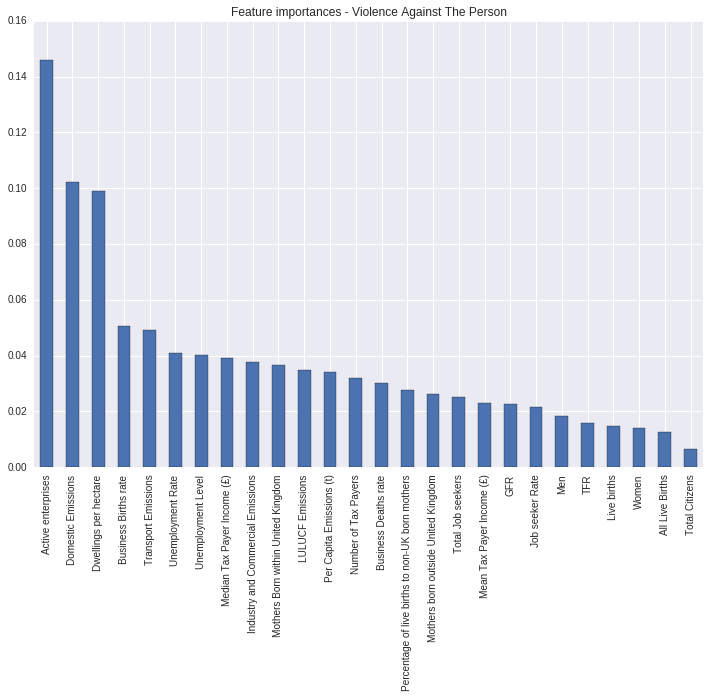

In [59]:
plot_importance(features, targets, crime_categories[1])

Results for category: Burglary
Out of bag score:0.758333333333
Test score: 0.7375
Confusion matrix: [[42  4]
 [17 17]]
F1-Score: 0.618181818182


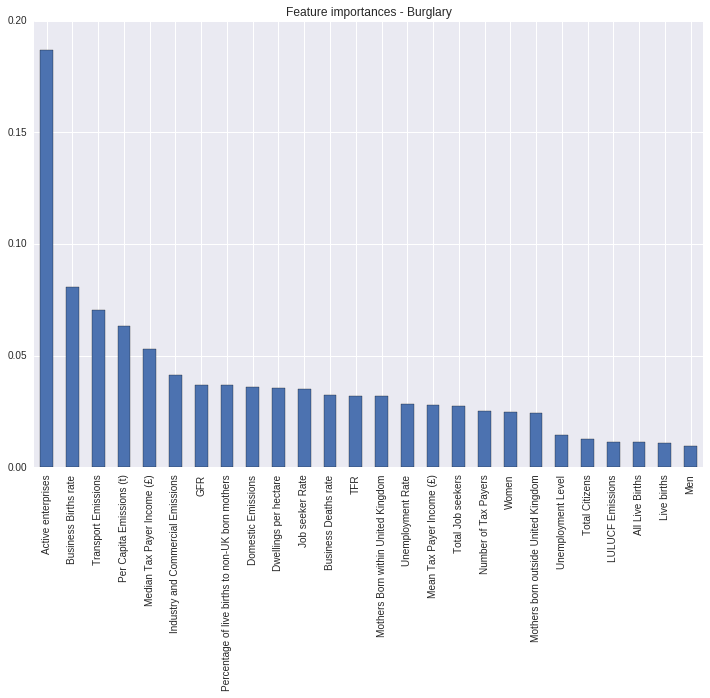

In [60]:
plot_importance(features, targets, crime_categories[2])

Results for category: Robbery
Out of bag score:0.7375
Test score: 0.75
Confusion matrix: [[35 10]
 [10 25]]
F1-Score: 0.714285714286


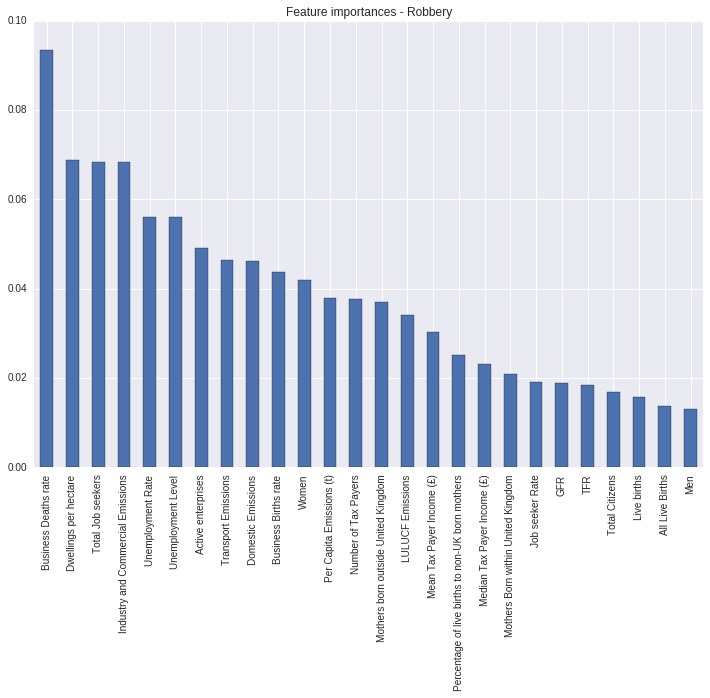

In [61]:
plot_importance(features, targets, crime_categories[3])

Results for category: Criminal Damage
Out of bag score:0.858333333333
Test score: 0.8875
Confusion matrix: [[37  7]
 [ 2 34]]
F1-Score: 0.883116883117


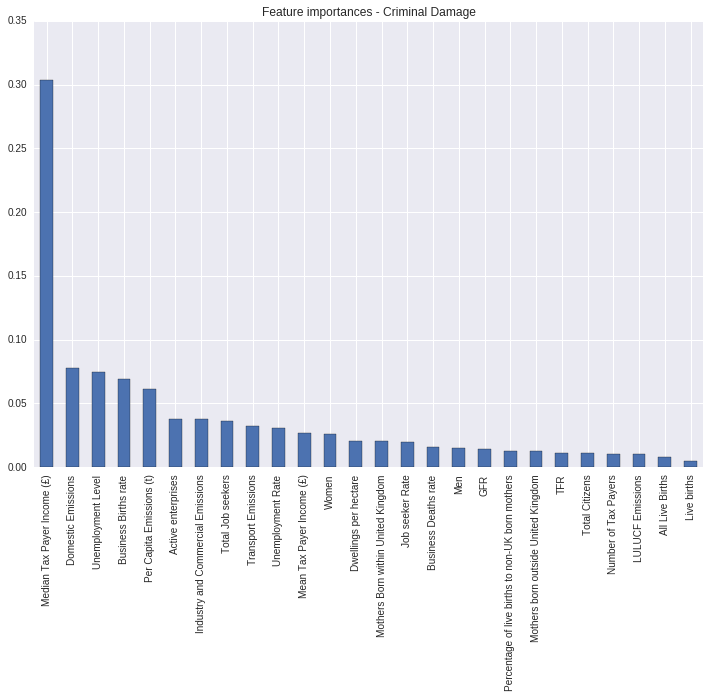

In [62]:
plot_importance(features, targets, crime_categories[4])

Results for category: Drugs
Out of bag score:0.820833333333
Test score: 0.7625
Confusion matrix: [[39  9]
 [10 22]]
F1-Score: 0.698412698413


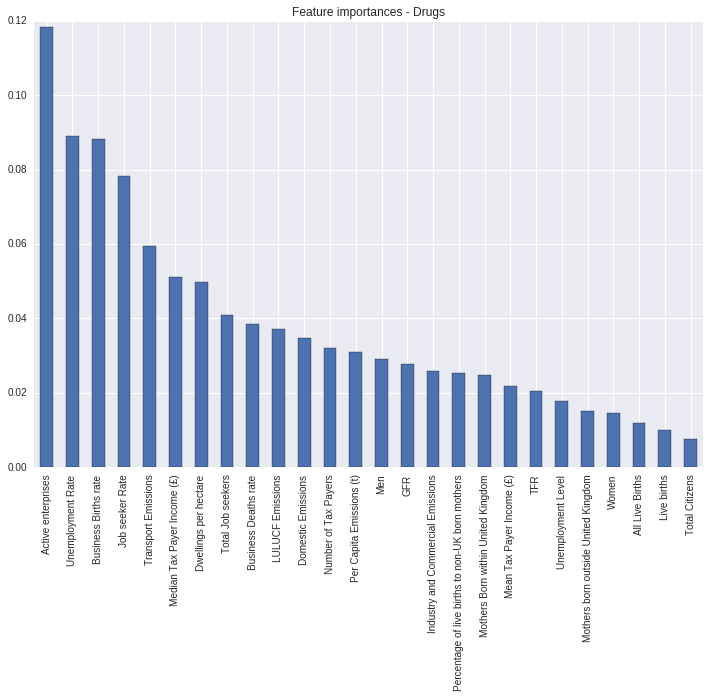

In [63]:
plot_importance(features, targets, crime_categories[5])

Results for category: Sexual Offences
Out of bag score:0.791666666667
Test score: 0.7875
Confusion matrix: [[37 10]
 [ 7 26]]
F1-Score: 0.753623188406


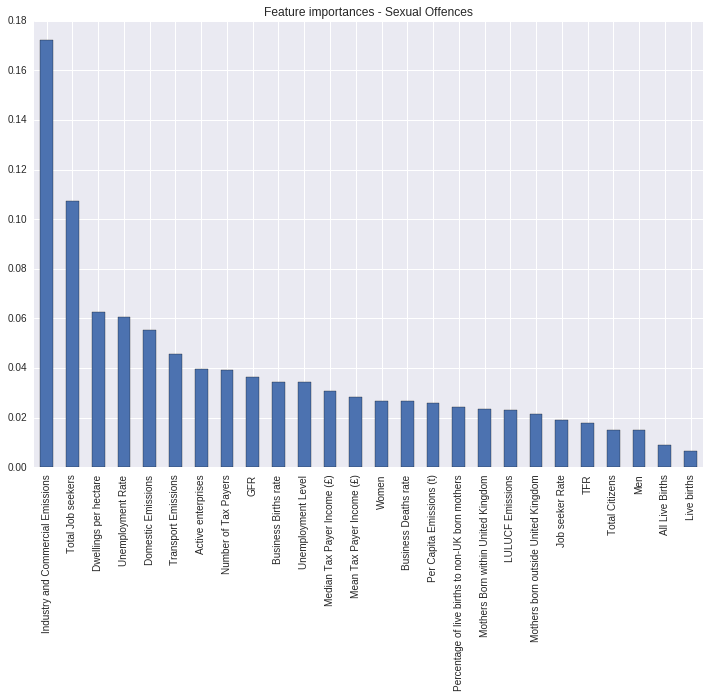

In [64]:
plot_importance(features, targets, crime_categories[6])

Results for category: Other Notifiable Offences
Out of bag score:0.795833333333
Test score: 0.8
Confusion matrix: [[34 12]
 [ 4 30]]
F1-Score: 0.789473684211


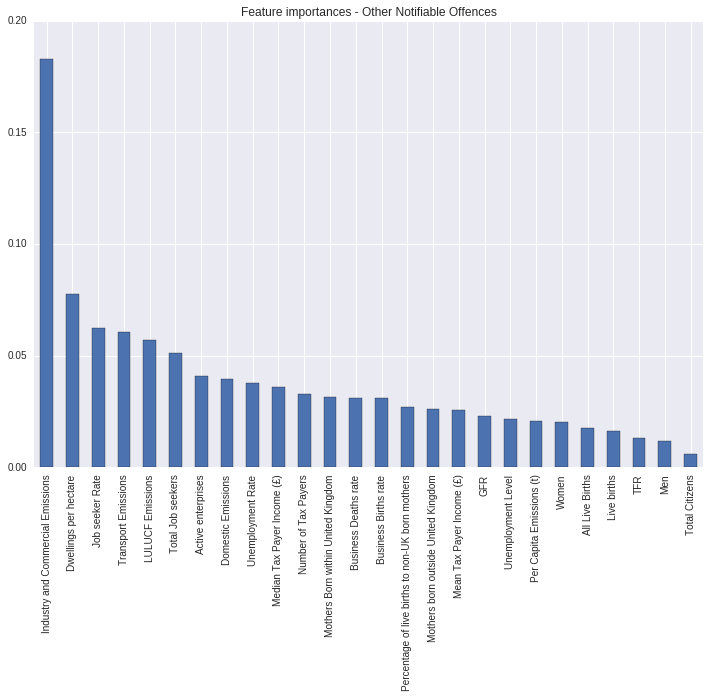

In [65]:
plot_importance(features, targets, crime_categories[7])

Results for category: Fraud & Forgery
Out of bag score:0.779166666667
Test score: 0.7875
Confusion matrix: [[38  6]
 [11 25]]
F1-Score: 0.746268656716


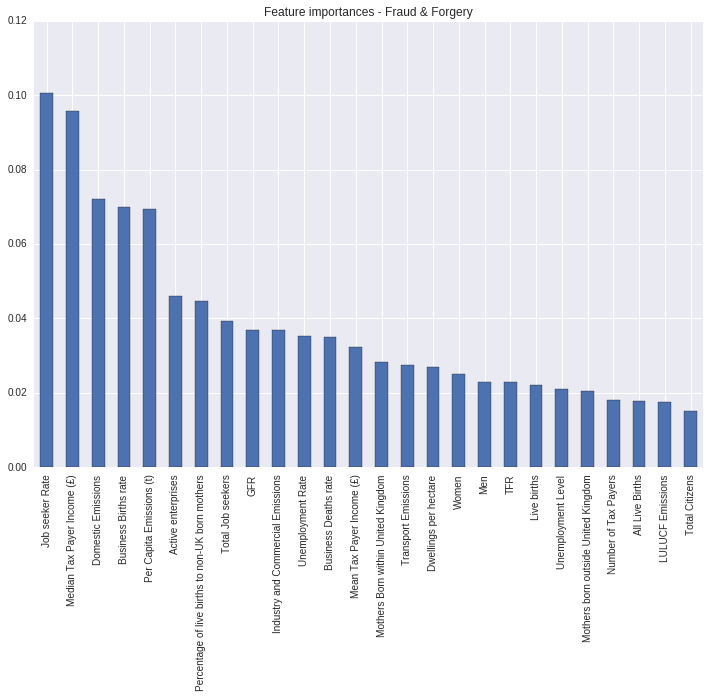

In [66]:
plot_importance(features, targets, crime_categories[8])

Results for category: Total Notifiable Offences
Out of bag score:0.825
Test score: 0.8125
Confusion matrix: [[45  4]
 [11 20]]
F1-Score: 0.727272727273


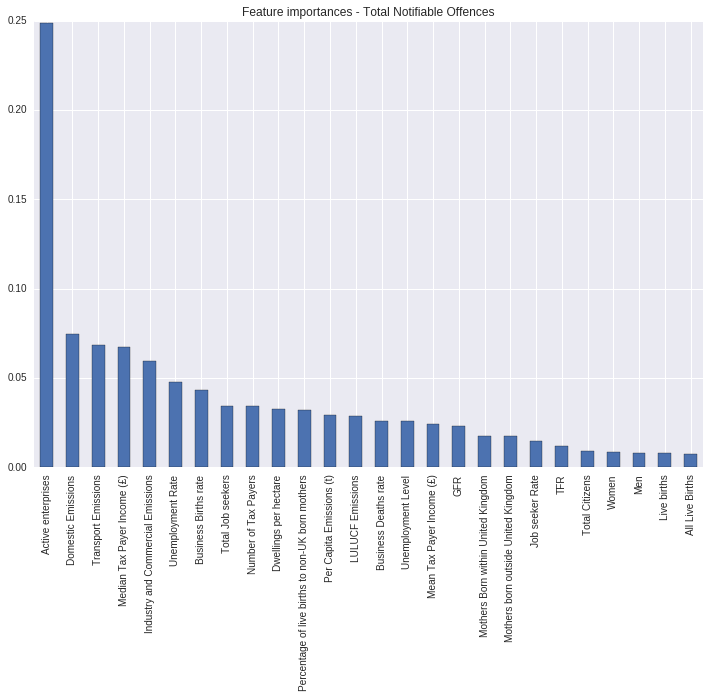

In [68]:
plot_importance(features, targets, crime_categories[9])